In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train  = pd.read_csv("/content/drive/MyDrive/DACON/쇼핑몰 지점별 매출액 예측 경진대회/train.csv")
test = pd.read_csv("/content/drive/MyDrive/DACON/쇼핑몰 지점별 매출액 예측 경진대회/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/DACON/쇼핑몰 지점별 매출액 예측 경진대회/sample_submission.csv")

In [4]:
def holiday_to_number(isholiday):
  if isholiday == True:
    return 1
  else:
    return 0

def preprocessing(data):
  data = data.copy()
  data.Date = pd.to_datetime(data.Date, format="%d/%m/%Y")

  data['Week'] = data.Date.dt.isocalendar().week.apply(lambda x: int(x))
  data['Day'] = data.Date.dt.day.apply(lambda x: int(x))
  data['Year'] = data.Date.dt.year.apply(lambda x: int(x))
  data['Month'] = data.Date.dt.month.apply(lambda x: int(x))
    
    # True/False => 1/0
  data['NumberHoliday'] = data['IsHoliday'].apply(holiday_to_number)
    
  return data

In [5]:
train = preprocessing(train)
test = preprocessing(test)
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Week,Day,Year,Month,NumberHoliday
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90,5,5,2010,2,0
1,2,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44,6,12,2010,2,1
2,3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17,7,19,2010,2,0
3,4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59,8,26,2010,2,0
4,5,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68,9,5,2010,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,35,31,2012,8,0
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,36,7,2012,9,1
6252,6253,45,2012-09-14,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27,37,14,2012,9,0
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,38,21,2012,9,0


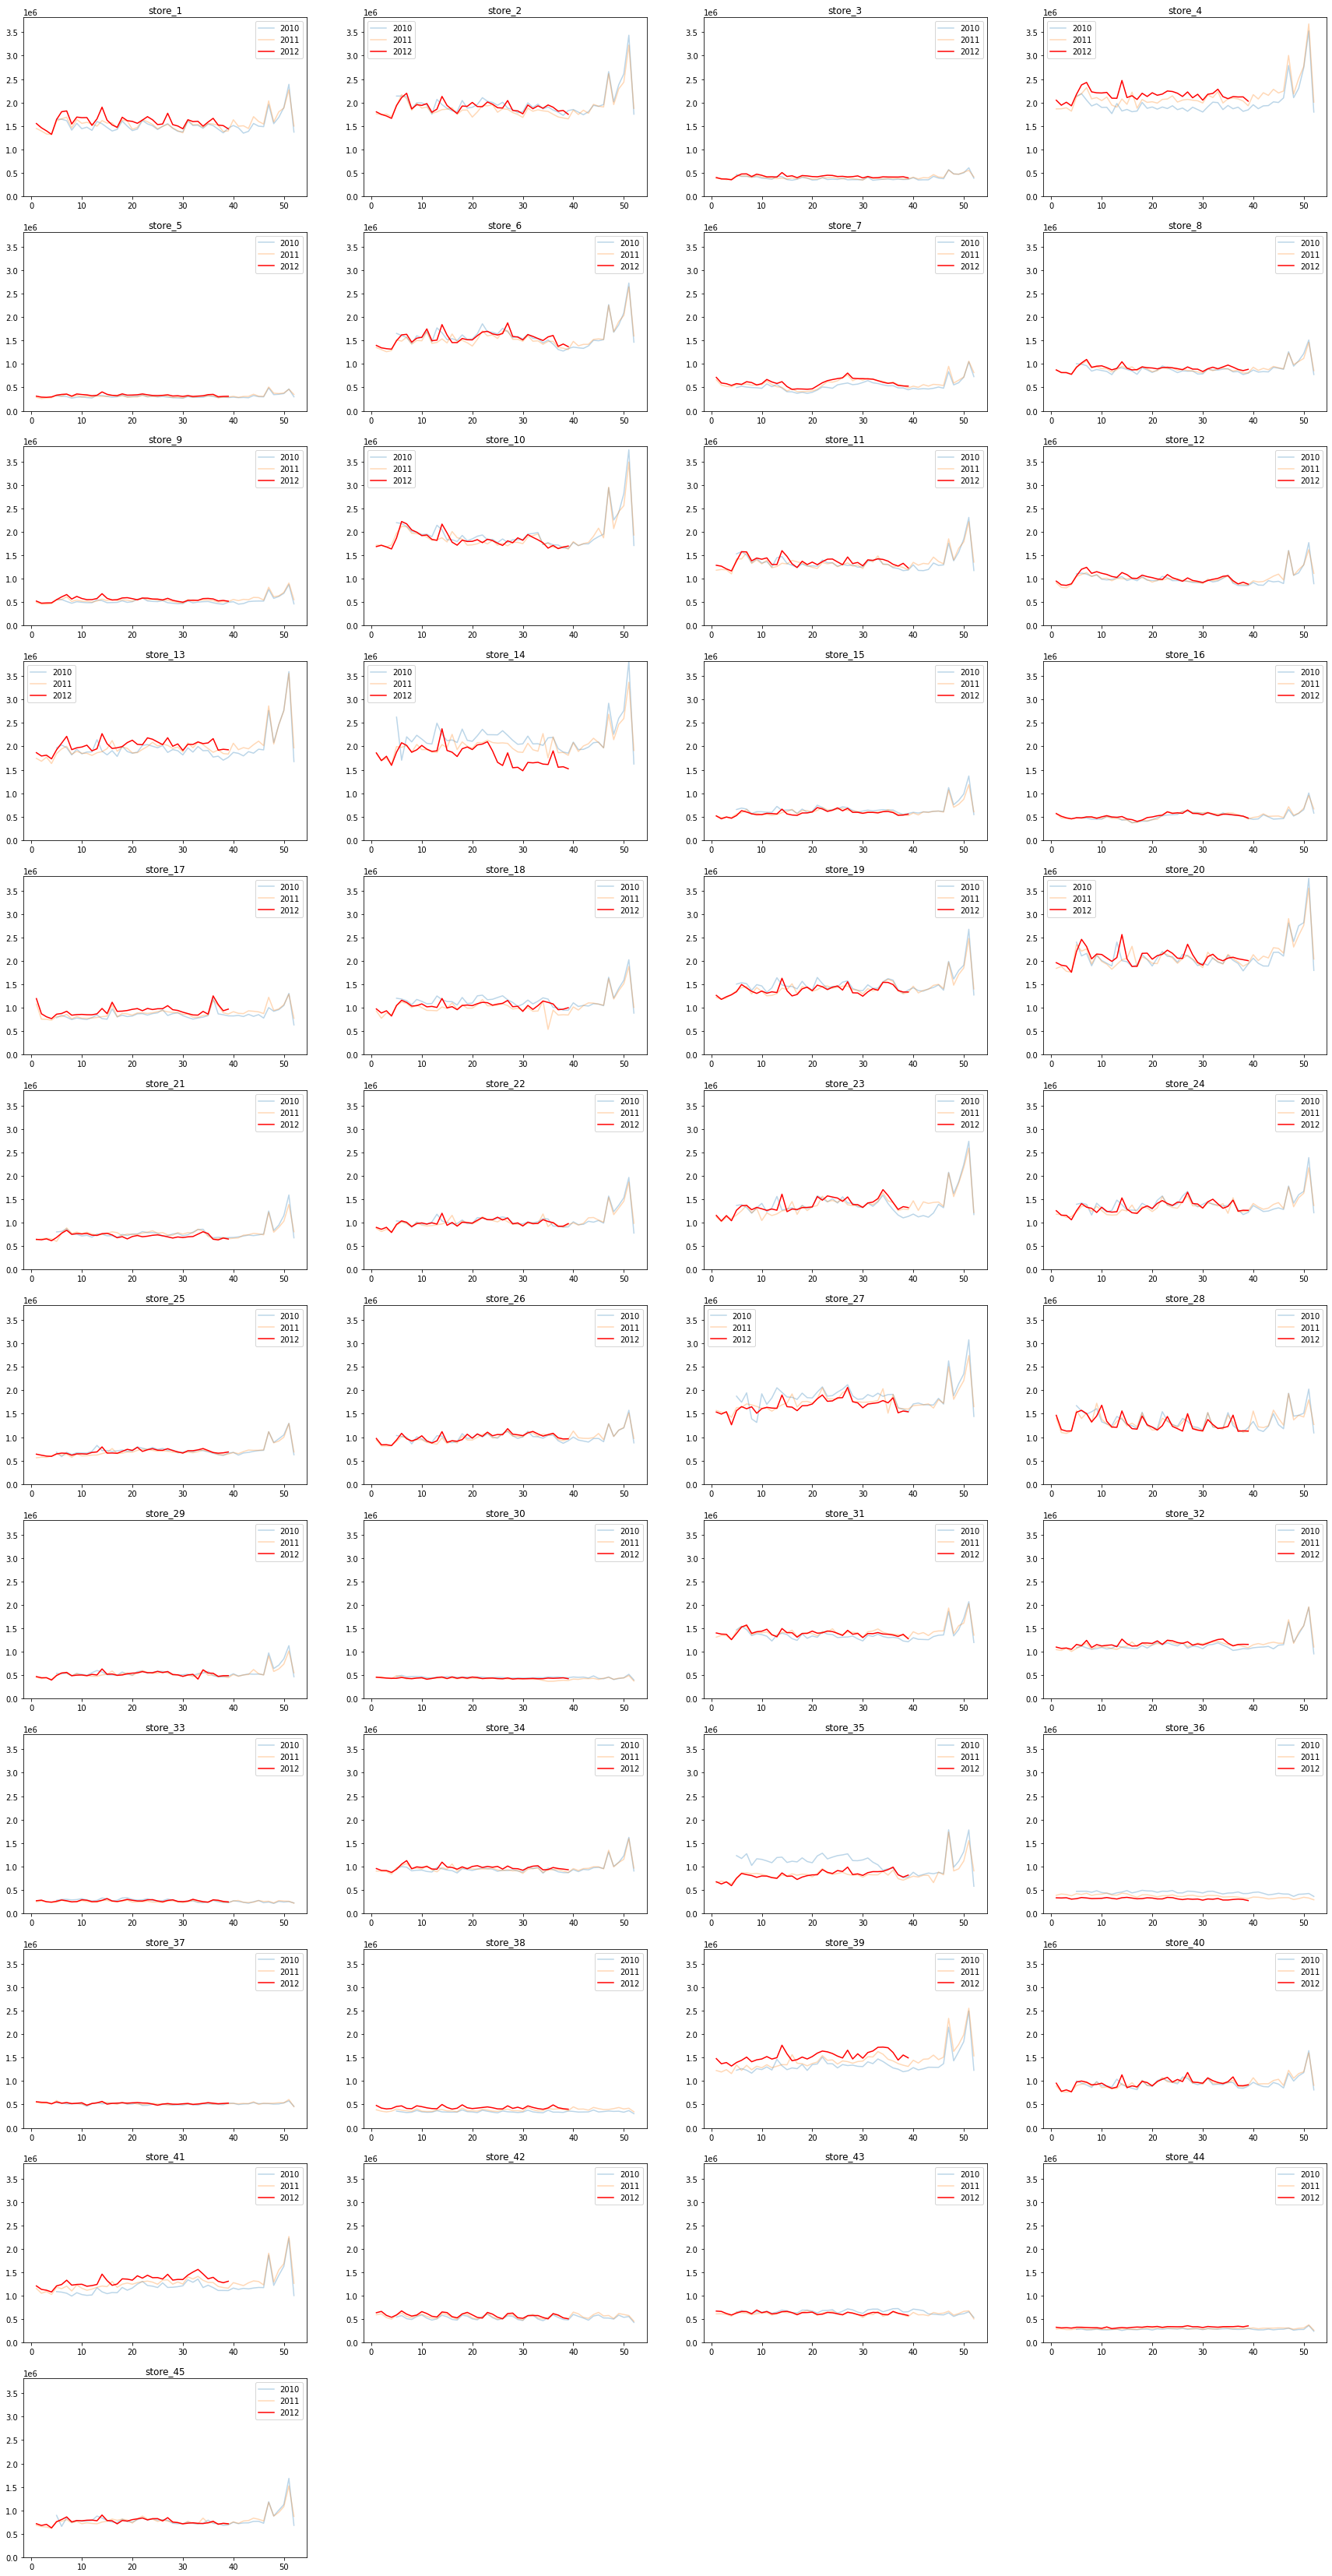

In [6]:
max_sales = max(train.Weekly_Sales)

fig = plt.figure(figsize=(30,60))

for store in range(1, max(train.Store)+1):
  storeset = train[train.Store==store]
  storeset_2010 = storeset[storeset.Year==2010]
  storeset_2011 = storeset[storeset.Year==2011]
  storeset_2012 = storeset[storeset.Year==2012]

  ax = fig.add_subplot(12,4, store)
  plt.title(f"store_{store}")
  ax.plot(storeset_2010.Week, storeset_2010.Weekly_Sales, label="2010", alpha=0.3)
  ax.plot(storeset_2011.Week, storeset_2011.Weekly_Sales, label="2011", alpha=0.3)
  ax.plot(storeset_2012.Week, storeset_2012.Weekly_Sales, label="2012", color='r')
  ax.legend()
  plt.ylim(0, max_sales)
    
plt.show()

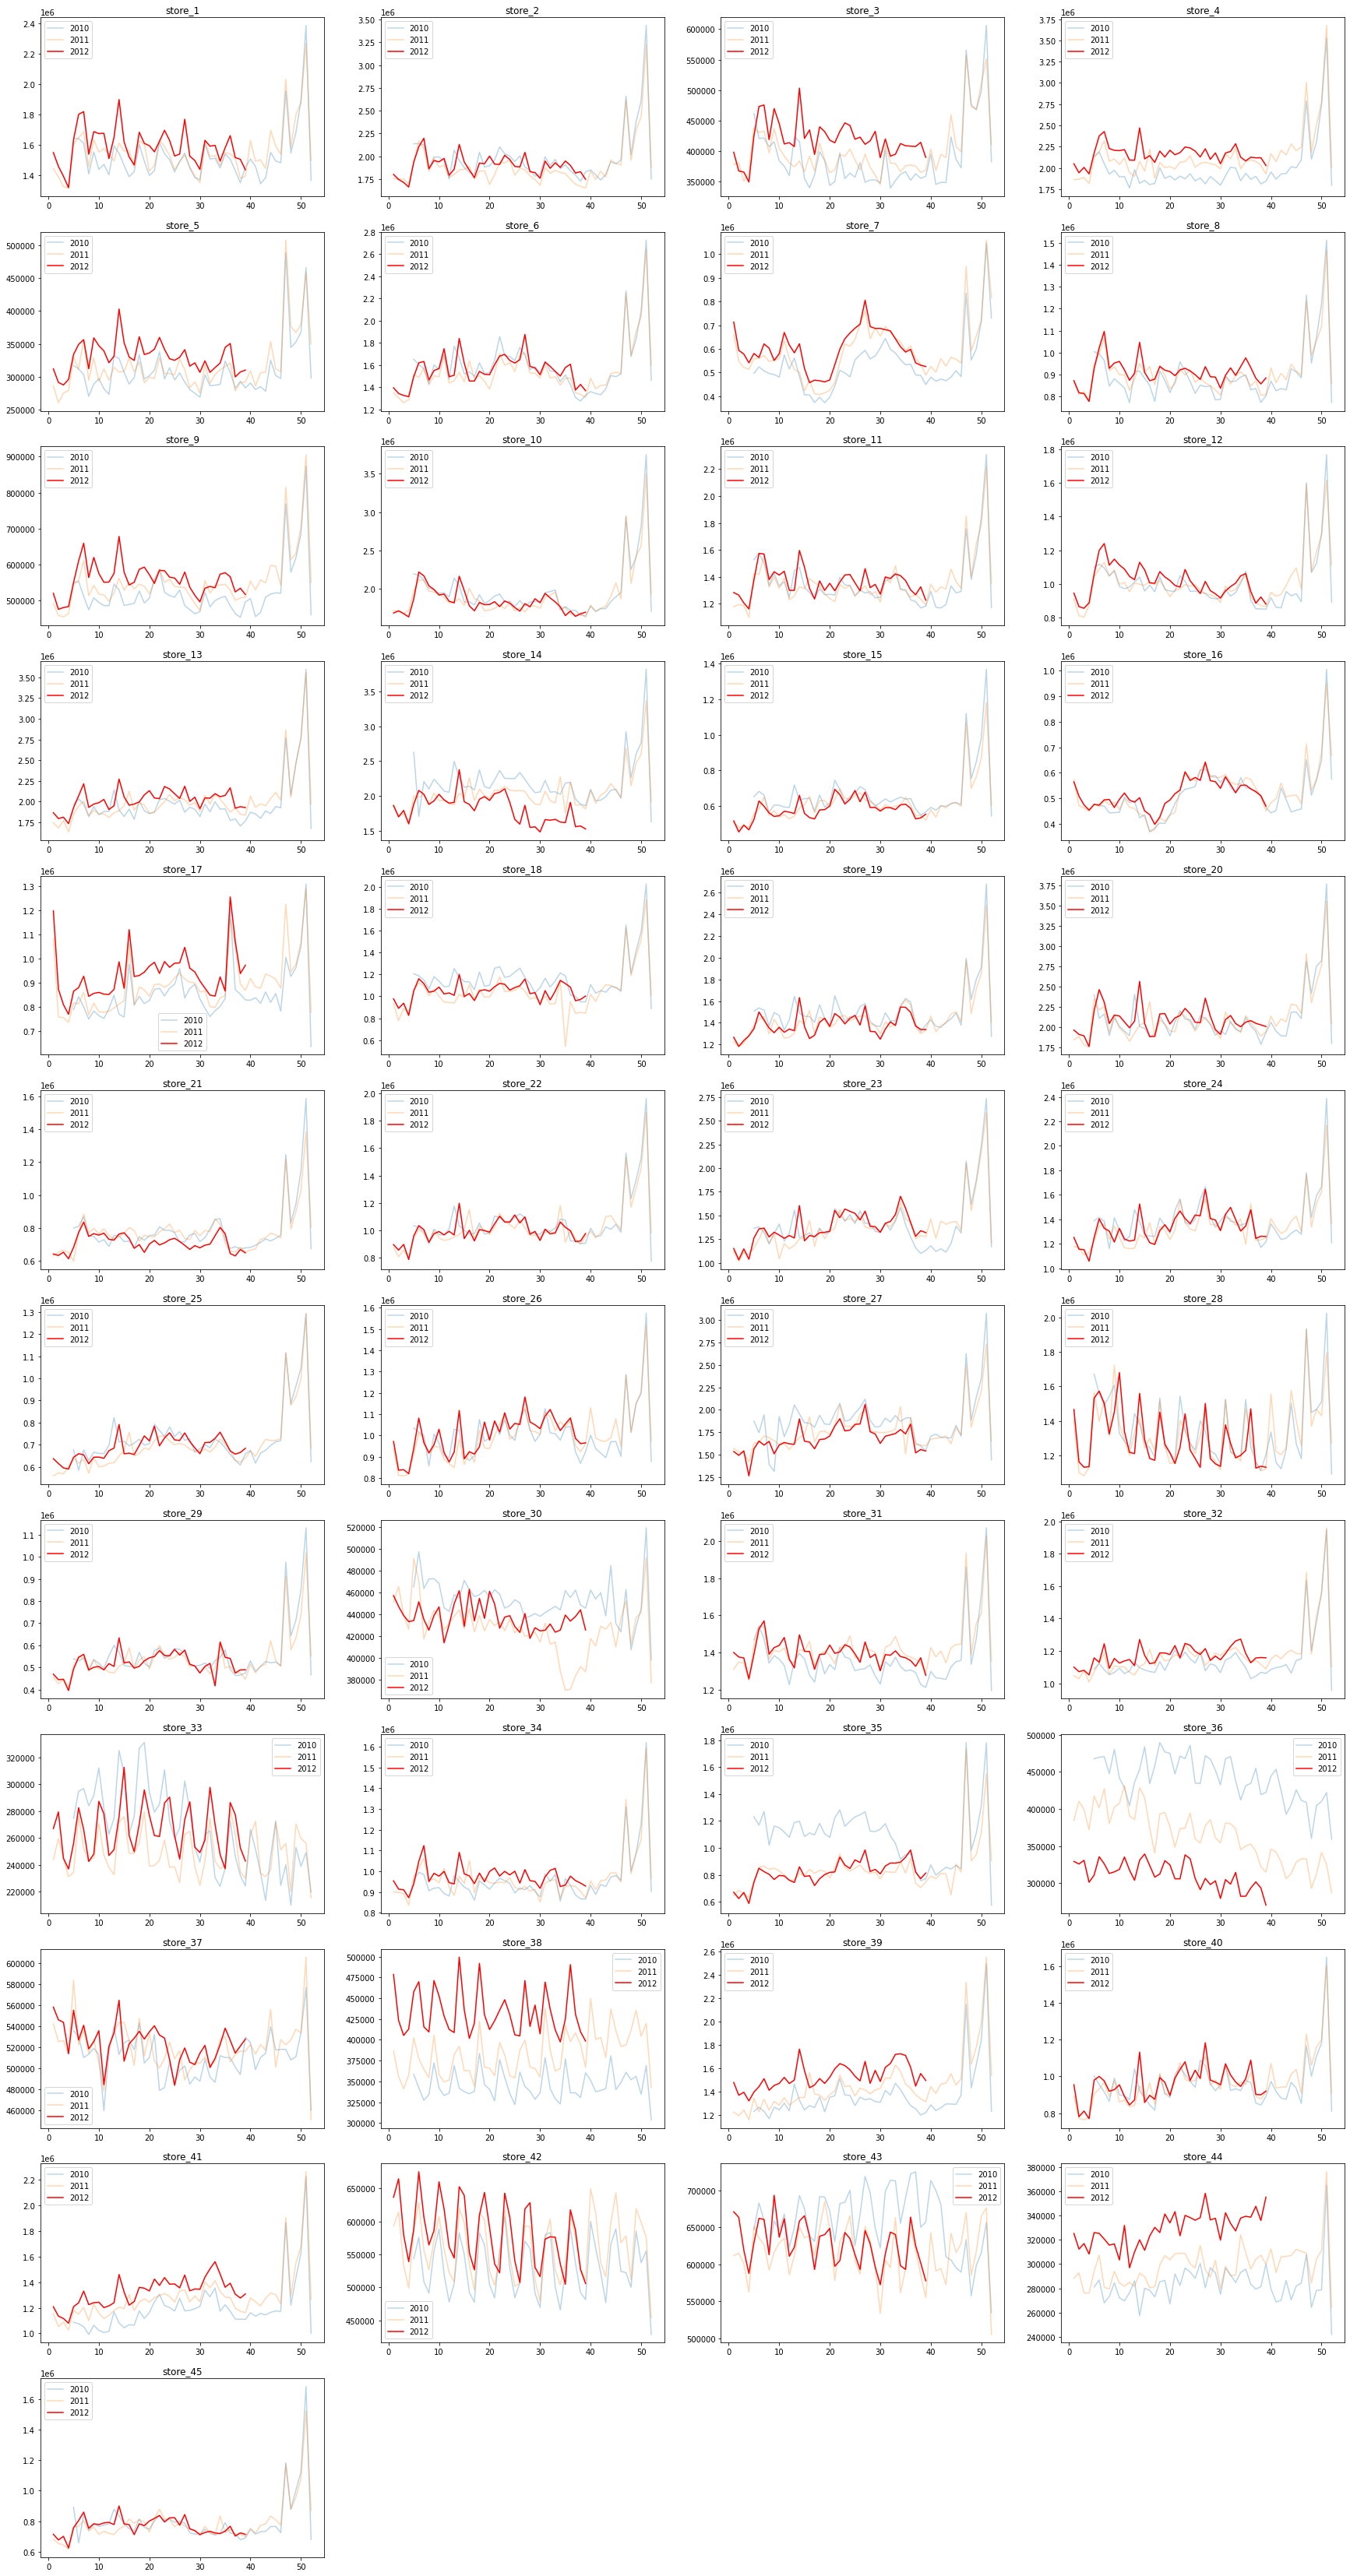

In [7]:
fig = plt.figure(figsize=(30,60))

for store in range(1,max(train.Store)+1):
    storeset = train[train.Store==store]
    storeset_2010 = storeset[storeset.Year==2010]
    storeset_2011 = storeset[storeset.Year==2011]
    storeset_2012 = storeset[storeset.Year==2012]
    
    ax = fig.add_subplot(12, 4, store)
    
    plt.title(f"store_{store}")
    ax.plot(storeset_2010.Week, storeset_2010.Weekly_Sales, label="2010", alpha=0.3)
    ax.plot(storeset_2011.Week, storeset_2011.Weekly_Sales, label="2011", alpha=0.3)
    ax.plot(storeset_2012.Week, storeset_2012.Weekly_Sales, label="2012", color='r')
    ax.legend()
    
plt.show()

In [8]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Week,Day,Year,Month,NumberHoliday
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90,5,5,2010,2,0
1,2,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44,6,12,2010,2,1
2,3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17,7,19,2010,2,0
3,4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59,8,26,2010,2,0
4,5,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68,9,5,2010,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,35,31,2012,8,0
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,36,7,2012,9,1
6252,6253,45,2012-09-14,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27,37,14,2012,9,0
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,38,21,2012,9,0


In [9]:
import numpy as np

train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

promotions = ["Promotion1", "Promotion2", "Promotion3", "Promotion4", "Promotion5"]

for promotion in promotions:
  train[promotion][train[promotion]<0] = 0
  test[promotion][test[promotion]<0] = 0
  train[promotion] = np.log1p(train[promotion])
  test[promotion] = np.log1p(test[promotion])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [10]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Week,Day,Year,Month,NumberHoliday
0,1,1,2010-02-05,42.31,2.572,0.000000,0.000000,0.000000,0.000000,0.000000,8.106,False,1643690.90,5,5,2010,2,0
1,2,1,2010-02-12,38.51,2.548,0.000000,0.000000,0.000000,0.000000,0.000000,8.106,True,1641957.44,6,12,2010,2,1
2,3,1,2010-02-19,39.93,2.514,0.000000,0.000000,0.000000,0.000000,0.000000,8.106,False,1611968.17,7,19,2010,2,0
3,4,1,2010-02-26,46.63,2.561,0.000000,0.000000,0.000000,0.000000,0.000000,8.106,False,1409727.59,8,26,2010,2,0
4,5,1,2010-03-05,46.50,2.625,0.000000,0.000000,0.000000,0.000000,0.000000,8.106,False,1554806.68,9,5,2010,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,10.070793,1.945910,4.542550,8.852137,8.292331,8.684,False,734297.87,35,31,2012,8,0
6251,6252,45,2012-09-07,75.70,3.911,9.307962,2.624669,3.982109,7.526055,7.628858,8.684,True,766512.66,36,7,2012,9,1
6252,6253,45,2012-09-14,67.87,3.948,9.342153,0.000000,1.667707,8.138191,8.569770,8.684,False,702238.27,37,14,2012,9,0
6253,6254,45,2012-09-21,65.32,4.038,9.042300,4.535606,4.162626,7.773754,9.067786,8.684,False,723086.20,38,21,2012,9,0


In [11]:
from sklearn.metrics import mean_squared_error

def RMSE(y, y_pred):
  return mean_squared_error(y, y_pred)**0.5

In [12]:
from sklearn.ensemble import RandomForestRegressor

models = []
rmses = []

# Using features related to days has the highest accuracy
features = ['Store', 'NumberHoliday', 'Week', 'Day', 'Month', 'Year']


for store in range(1,max(train.Store)+1):
  train_store = train[train.Store==store]

  train_store_2010 = train_store[(train_store.Year==2010) & (train_store.Month<=9)]
  train_store_2011 = train_store[(train_store.Year==2011) & (train_store.Month<=9)]
  train_store_2012 = train_store[(train_store.Year==2012) & (train_store.Month<9)]

  train_set = pd.concat([train_store_2010, train_store_2011, train_store_2012])

  #train_model = xgboost.XGBRegressor(**model_params)
  train_model = RandomForestRegressor()
  train_model.fit(train_set[features],train_set.Weekly_Sales)

  x_test = train_store[(train_store.Year==2012) & (train_store.Month==9)]
  pred = train_model.predict(x_test[features])
  rmse = RMSE(pred, x_test.Weekly_Sales)

  print(f"{store:02}", rmse)
  rmses.append(rmse)

  train_store_target = pd.concat([
        train_store[(train_store.Year==2010) & (train_store.Month<=10)],
        train_store[(train_store.Year==2011) & (train_store.Month<=10)],
        train_store[(train_store.Year==2012)]
    ])

  model = RandomForestRegressor()
  model.fit(train_store_target[features], train_store_target.Weekly_Sales)
        
  models.append(model)

print(sum(rmses)/ len(rmses))

01 42720.169027587355
02 73062.7372805629
03 7281.5413067429245
04 84654.05275183117
05 17615.73030544847
06 77460.87429601308
07 19492.395078800866
08 23868.90526212519
09 24656.794205654365
10 29201.553421163426
11 36510.31330485551
12 24228.51887986079
13 91960.31081101189
14 89218.8928452583
15 22527.567182802293
16 19160.664249953217
17 122482.43089815961
18 135990.38792357084
19 27264.902027103697
20 86306.68826943553
21 29573.51899527743
22 21911.549184241052
23 28367.718871709407
24 29675.92369472117
25 35306.63638883315
26 17079.1241777489
27 86650.0773262238
28 22546.031377711846
29 25309.850998700622
30 45912.23434752495
31 37868.01109045574
32 24614.149937510072
33 8097.215383281407
34 26829.62159644187
35 49817.07643007799
36 11281.345636525417
37 7413.25698614905
38 15939.364907774312
39 176846.78729029
40 28530.827817981437
41 108560.76811401593
42 11964.011894159348
43 13711.40037306518
44 13965.537462406617
45 18344.241887068427
43372.926922174134


In [13]:
pred = []
for store in range(1, max(train.Store)+1):
    test_store = test[test.Store==store]
    
    y = models[store-1].predict(test_store[features])
    pred += y.tolist()

In [14]:
test_pred = test.copy()
test_pred["Weekly_Sales"] = pred

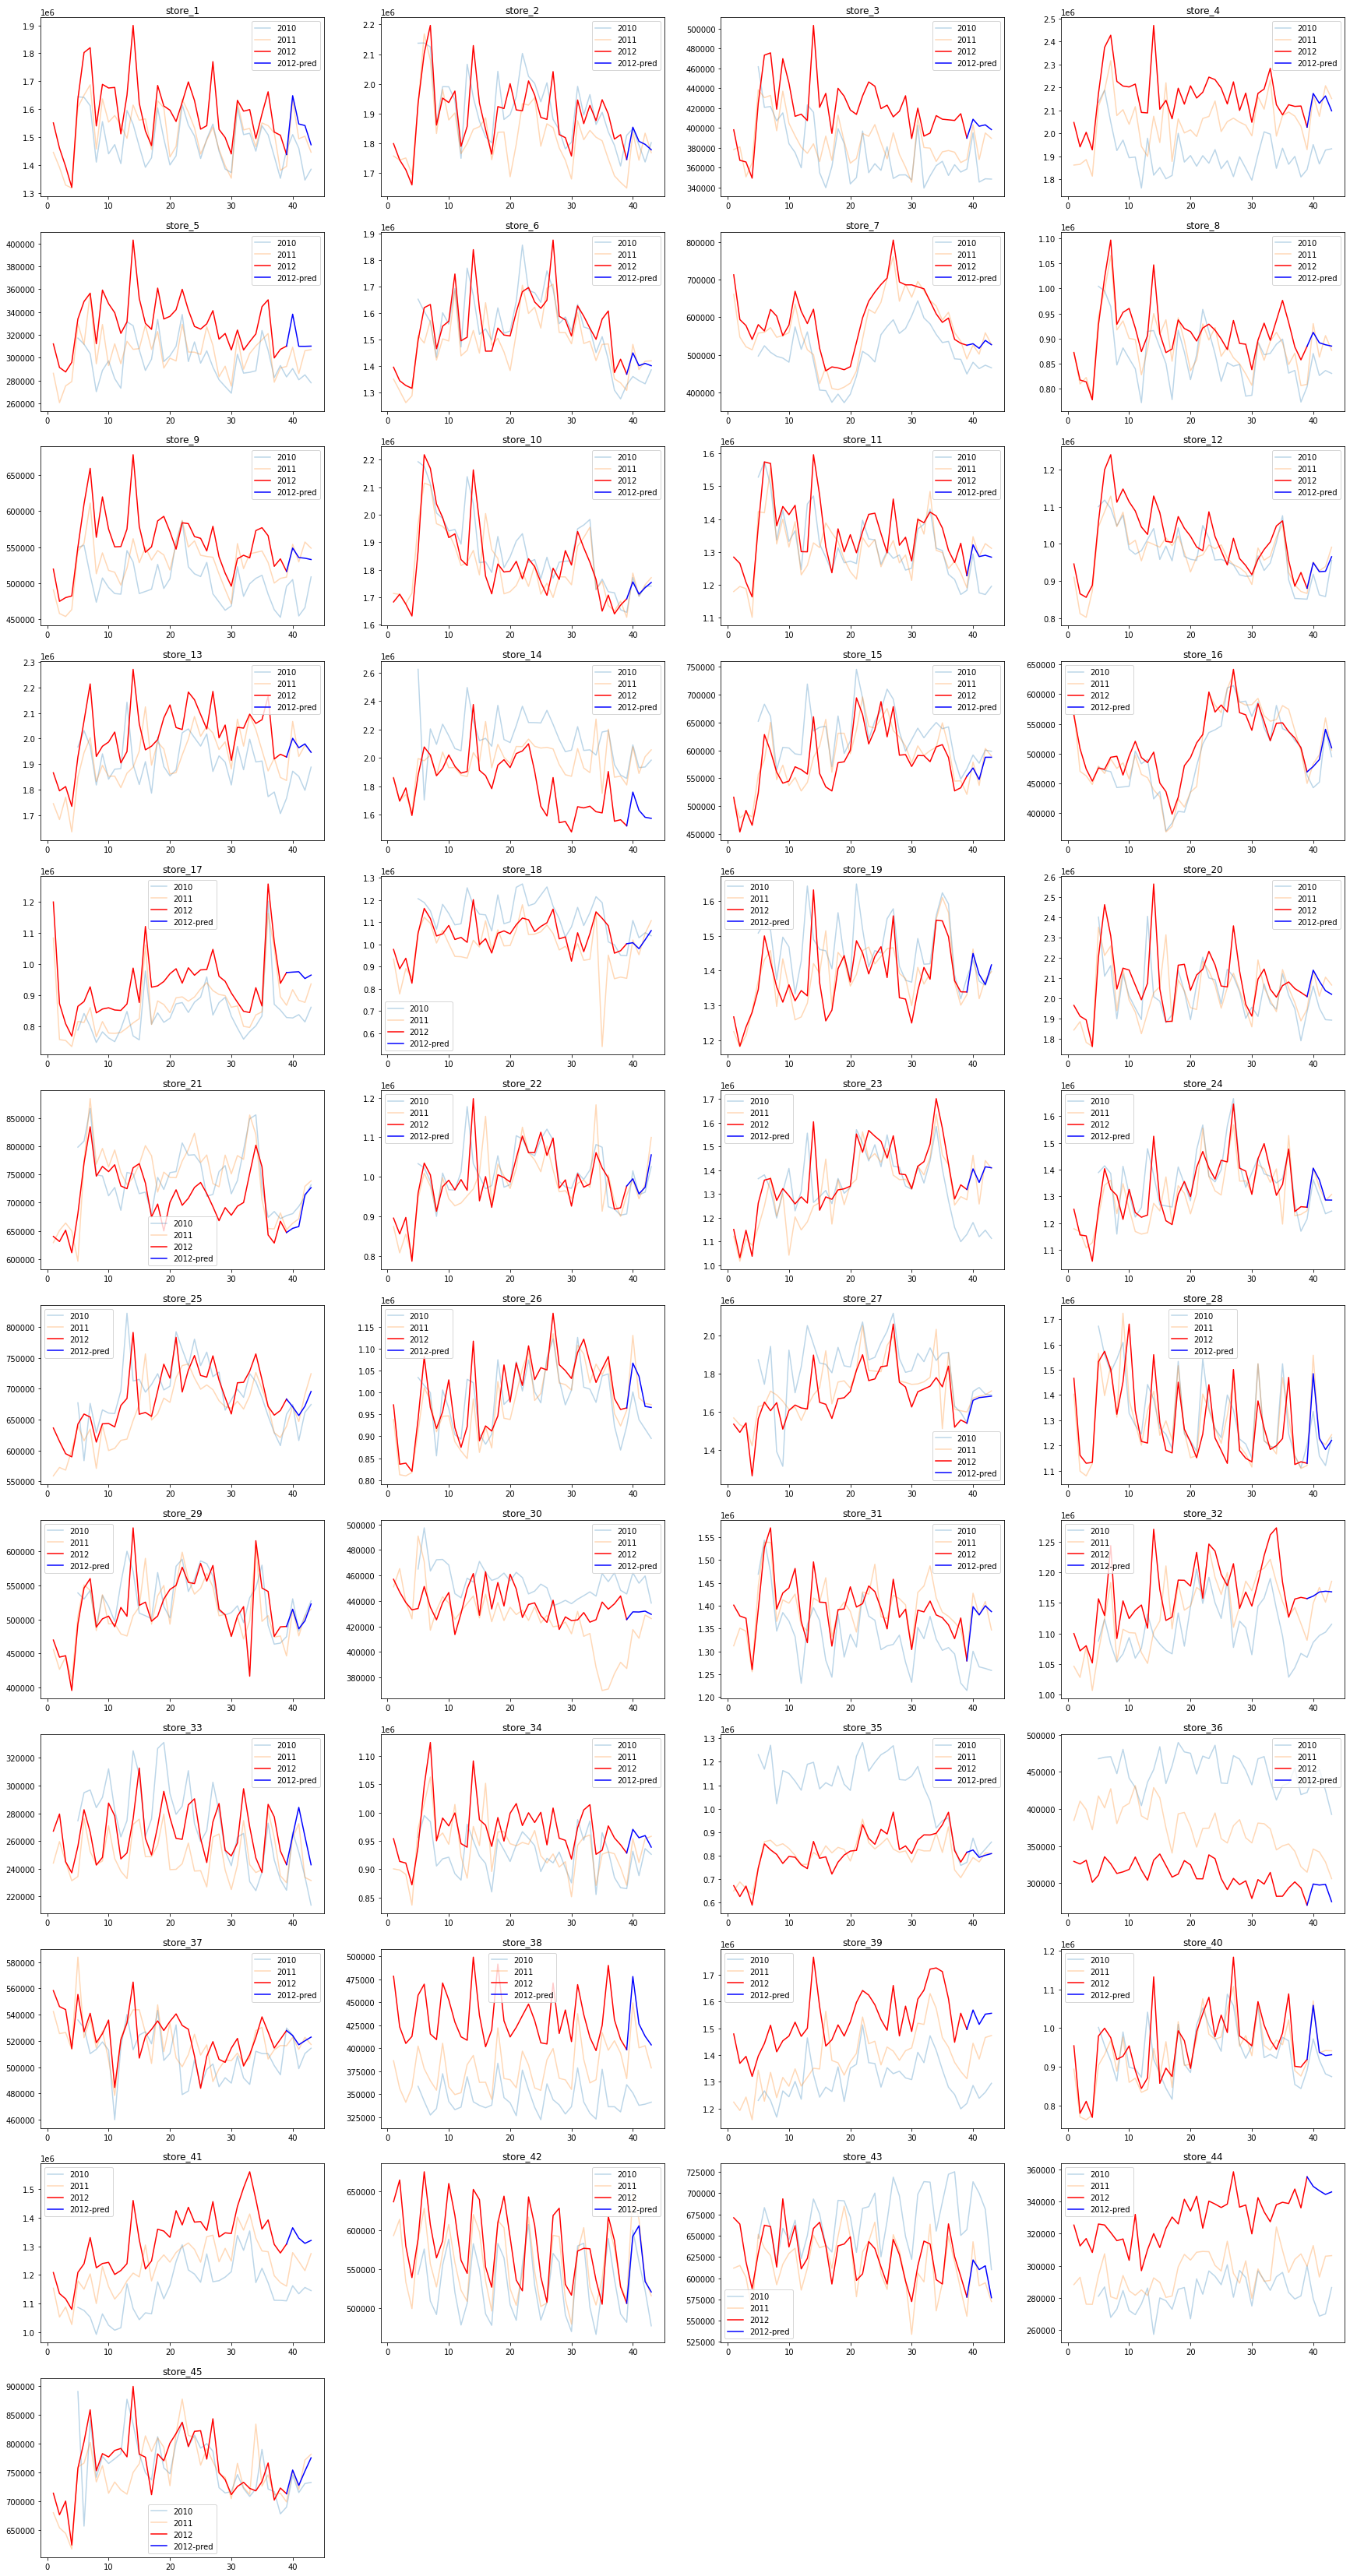

In [15]:
fig = plt.figure(figsize=(30,60))

for store in range(1,max(train.Store)+1):
    storeset = train[train.Store==store]
    storeset_2010 = storeset[(storeset.Year==2010) & (storeset.Month<=10)]
    storeset_2011 = storeset[(storeset.Year==2011) & (storeset.Month<=10)]
    storeset_2012 = storeset[(storeset.Year==2012) & (storeset.Month<=10)]
    
    test_pred_store = test_pred[test_pred.Store==store]
    
    # 그래프의 연속성을 위해 예측한 데이터의 전 주의 데이터도 넣어준다.
    test_pred_store = pd.concat([storeset_2012.iloc[-1:], test_pred_store])
    
    ax = fig.add_subplot(12, 4, store)
    
    plt.title(f"store_{store}")
    ax.plot(storeset_2010.Week, storeset_2010.Weekly_Sales, label="2010", alpha=0.3)
    ax.plot(storeset_2011.Week, storeset_2011.Weekly_Sales, label="2011", alpha=0.3)
    ax.plot(storeset_2012.Week, storeset_2012.Weekly_Sales, label="2012", color='r')
    ax.plot(test_pred_store.Week, test_pred_store.Weekly_Sales, label="2012-pred", color='b')
    ax.legend()
    
plt.show()

In [16]:
sample_submission["Weekly_Sales"] = test_pred.Weekly_Sales
sample_submission.to_csv("/content/drive/MyDrive/DACON/쇼핑몰 지점별 매출액 예측 경진대회/xgboost.csv", index=False)
sample_submission

,id,Weekly_Sales
0,1,1.647794e+06
1,2,1.546454e+06
2,3,1.540959e+06
3,4,1.472005e+06
4,5,1.854792e+06
...,...,...
175,176,3.459611e+05
176,177,7.543217e+05
177,178,7.277073e+05
178,179,7.523680e+05
